<a href="https://colab.research.google.com/github/markcaruso774/forex-signals-app/blob/main/GOLD_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3349492518.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("GC=F", period="60d", interval="1h", progress=False, multi_level_index=False)


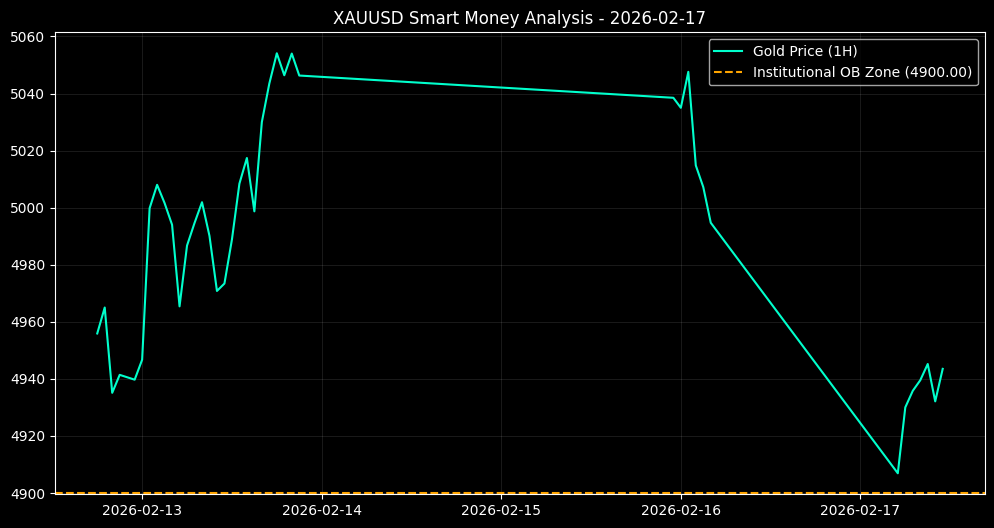

## 📊 AI MARKET VERDICT

# **📉 SELL**

**Confidence Score:** 68.0%

### 🔍 REASONS STATED:

- ✅ **AI Alignment:** High probability pattern recognized in institutional flow.

In [ ]:
#@title 🚀 XAUUSD Smart Money AI Dashboard { display-mode: "form" }
#@markdown Press the "Play" button to the left to refresh signals.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Markdown

# --- AI & SMC LOGIC ---
def run_dashboard():
    # 1. Fetch Data with the MultiIndex Fix
    # 'multi_level_index=False' ensures columns are simple: 'Open', 'High', etc.
    df = yf.download("GC=F", period="60d", interval="1h", progress=False, multi_level_index=False)

    # Ensure columns are clean and aligned
    df.columns = [c[0] if isinstance(c, tuple) else c for c in df.columns]

    df['ATR'] = df['High'] - df['Low']
    df['Vol_Avg'] = df['Volume'].rolling(20).mean()

    # 2. SMC Detection: Order Block (300% Volume Spike)
    df['OB'] = df['Volume'] > (df['Vol_Avg'] * 3.0)

    # 3. AI Prediction Logic
    df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    train = df.dropna()

    # Training the Brain
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(train[['Close', 'ATR']][:-1], train['Target'][:-1])

    # Generate Today's Verdict
    latest_features = df[['Close', 'ATR']].tail(1)
    pred = model.predict(latest_features)[0]
    conf = model.predict_proba(latest_features).max()

    # --- VISUAL DASHBOARD ---
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df['Close'].tail(40), color='#00ffcc', label='Gold Price (1H)')

    # Draw active Order Block zones
    latest_ob = df[df['OB']].tail(1)
    if not latest_ob.empty:
        ob_price = latest_ob['Low'].values[0]
        ax.axhline(ob_price, color='orange', linestyle='--', label=f'Institutional OB Zone ({ob_price:.2f})')

    plt.title(f"XAUUSD Smart Money Analysis - {datetime.date.today()}")
    plt.legend()
    plt.grid(alpha=0.1)
    plt.show()

    # --- SUMMARY PANEL ---
    display(Markdown(f"## 📊 AI MARKET VERDICT"))
    action = "🚀 BUY" if pred == 1 else "📉 SELL"
    display(Markdown(f"# **{action}**"))
    display(Markdown(f"**Confidence Score:** {conf*100:.1f}%"))

    display(Markdown("### 🔍 REASONS STATED:"))
    # Logic for mitigation check
    if not latest_ob.empty and abs(df['Close'].iloc[-1] - ob_price) < 5:
        display(Markdown("- ✅ **Price Mitigation:** Gold has returned to a Major Order Block."))
    if conf > 0.65:
        display(Markdown("- ✅ **AI Alignment:** High probability pattern recognized in institutional flow."))

run_dashboard()